In [26]:
import numpy as np
import matplotlib.pyplot as plt


# Definindo Funções

In [27]:
def MonteCarlo_m1(a, b, ymax, n, N, fun):
    lado1 = b-a
    lado2 = ymax
    lista = []
    for i in range(N):
        cont = 0
        for j in range(n):
            x = np.random.rand(1)[0]*b
            y = np.random.rand(1)[0]*ymax
    
            if y < fun(x):
                cont +=1
        lista.append(lado1*lado2*cont/n)
    
    err = np.std(lista)/np.sqrt(N)
    plt.hist(lista)
    resp = sum(lista)/N
    plt.axvline(resp, color='r', linewidth=1)
    plt.title("N Total: " + str(n))
    plt.show()
    print("Valor da integral = " + str(resp))
    print("Erro padrão = " + str(err))

In [28]:
def MonteCarlo_m2(a, b, n, N, fun):
    lista = []
    for i in range(N):
        somatorio = 0
        for j in range(n):
            x = np.random.rand(1)[0]*b
            somatorio += fun(x)
        lista.append(((b-a)/n)*somatorio)
    
    err = np.std(lista)/np.sqrt(N)
    plt.hist(lista)
    resp = sum(lista)/N
    plt.axvline(resp, color='r', linewidth=1)
    plt.title("N Total: " + str(n))
    plt.show()
    print("Valor da integral = " + str(resp))
    print("Erro padrão = " + str(err))

# Exercicio 1

In [29]:
def fun1(x):
    return np.exp(-x**2)

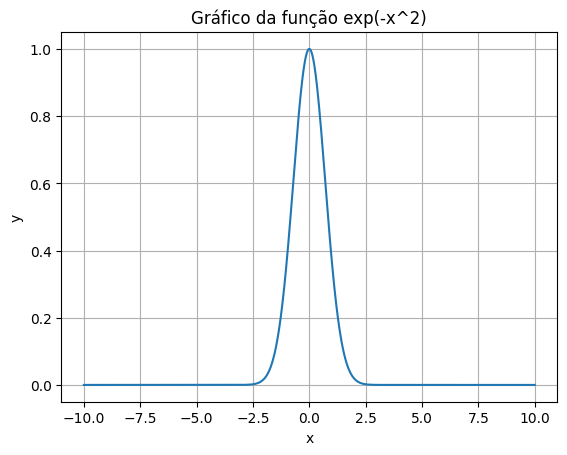

In [30]:
# Intervalo de valores de x
x_values = x = np.linspace(-10, 10, 1000)

# Calculando os valores correspondentes de y
y_values = fun1(x_values)

# Plotando a função
plt.plot(x_values, y_values)
plt.title('Gráfico da função exp(-x^2)')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.show()

## Metodo 1

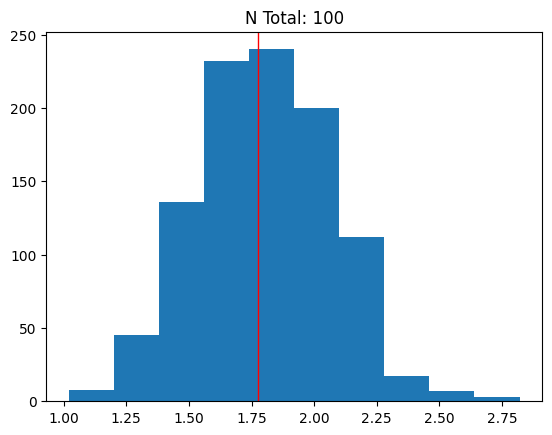

Valor da integral = 1.775639999999994
Erro padrão = 0.008681808014463348


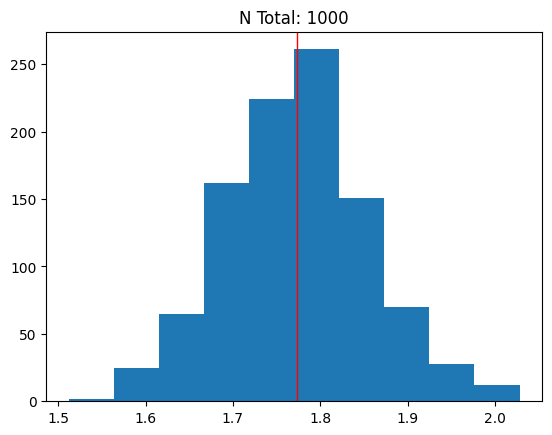

Valor da integral = 1.773065999999996
Erro padrão = 0.0026123773931038376


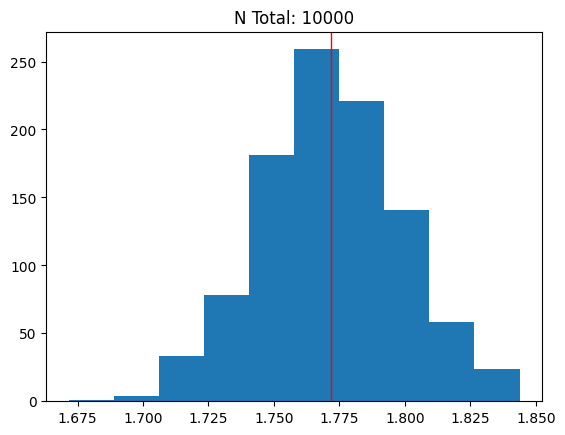

Valor da integral = 1.7719242000000006
Erro padrão = 0.000845413445812166


In [31]:
MonteCarlo_m1(-3,3,1,100,1000, fun1)
MonteCarlo_m1(-3,3,1,1000,1000, fun1)
MonteCarlo_m1(-3,3,1,10000,1000, fun1)

## Metodo 2

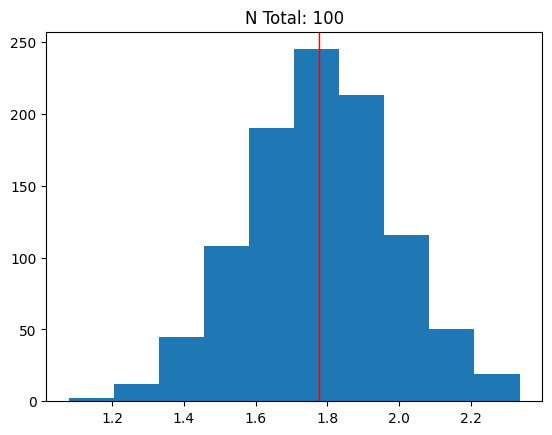

Valor da integral = 1.7782758798439033
Erro padrão = 0.006434902099704422


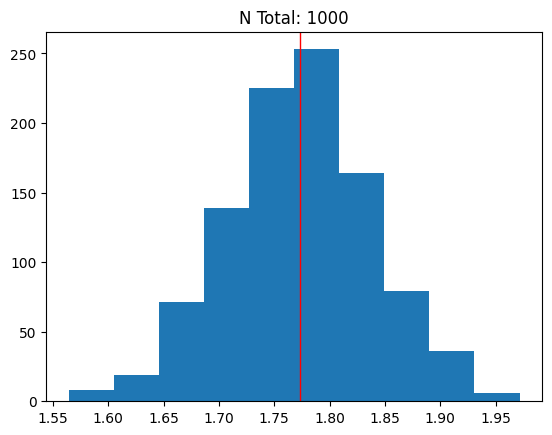

Valor da integral = 1.7731286677339706
Erro padrão = 0.0020734535270674247


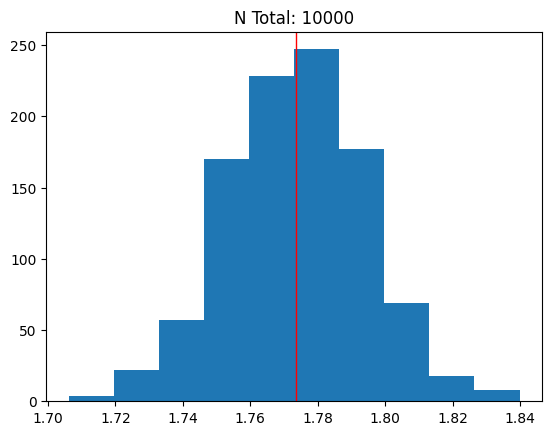

Valor da integral = 1.7736045464204744
Erro padrão = 0.0006483263229075047


In [32]:
MonteCarlo_m2(-3,3,100,1000, fun1)
MonteCarlo_m2(-3,3,1000,1000, fun1)
MonteCarlo_m2(-3,3,10000,1000, fun1)

## Discussão

Apesar de os resultados serem muito próximos com erros de precisão pequenos, o método 2 parece ser mais eficaz em termos de precisão na estimativa da integral e erro padrão, especialmente quando o número de pontos de amostra aumenta. Mas ambos os métodos aumentaram a precisão conforme houve o aumento de número de pontos

# Exercício 2


## Metodo 1

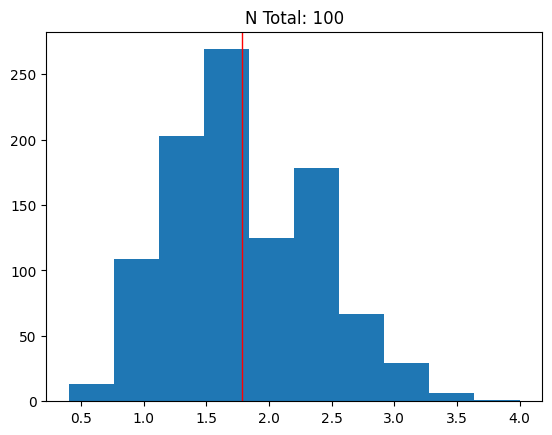

Valor da integral = 1.7847999999999986
Erro padrão = 0.01803355095370848


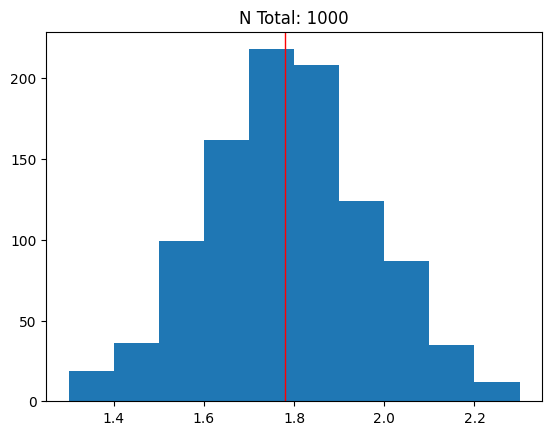

Valor da integral = 1.7787399999999969
Erro padrão = 0.005790165144449682


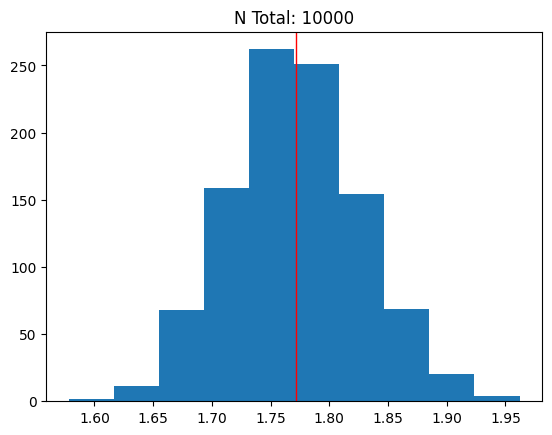

Valor da integral = 1.7712079999999994
Erro padrão = 0.0017714888472694383


In [33]:
MonteCarlo_m1(-10,10,1,100,1000, fun1)
MonteCarlo_m1(-10,10,1,1000,1000, fun1)
MonteCarlo_m1(-10,10,1,10000,1000, fun1)

## Metodo 2

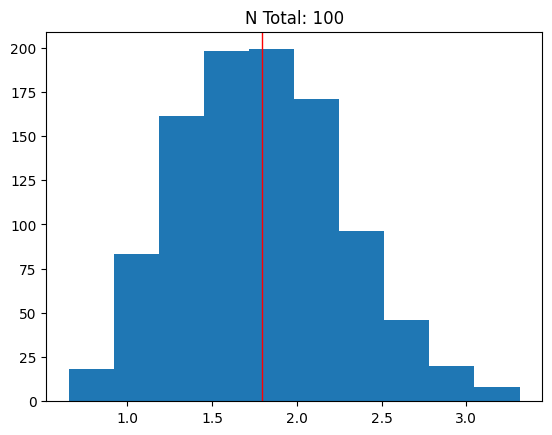

Valor da integral = 1.7937012113299526
Erro padrão = 0.01507206015418989


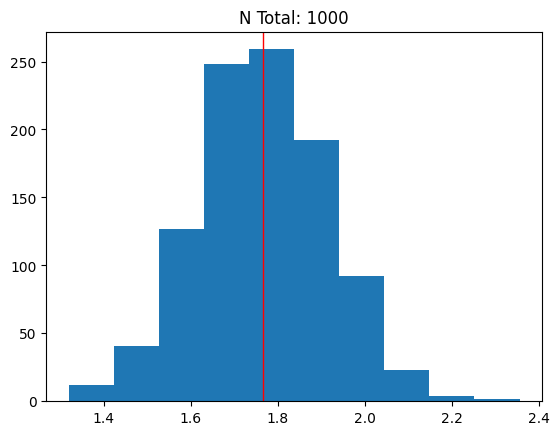

Valor da integral = 1.765251925374932
Erro padrão = 0.004753755579247463


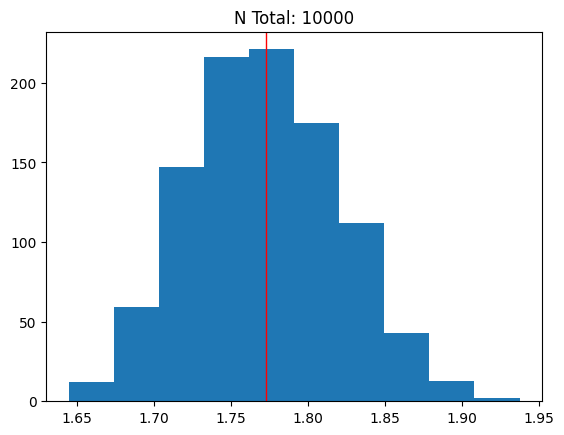

Valor da integral = 1.772362971707043
Erro padrão = 0.0015308666283721625


In [34]:
MonteCarlo_m2(-10,10,100,1000, fun1)
MonteCarlo_m2(-10,10,1000,1000, fun1)
MonteCarlo_m2(-10,10,10000,1000, fun1)

## Discussão

As conclusões da questão 1 se repetem aqui, apesar de os resultados serem muito próximos com erros de precisão pequenos, o método 2 parece ser mais eficaz em termos de precisão na estimativa da integral e erro padrão, especialmente quando o número de pontos de amostra aumenta. Mas ambos os métodos diminuiram o erro padrão conforme houve o aumento de número de pontos

# Exercicio 3

In [35]:
def MonteCarlo_3D(a1, b1, a2, b2, a3, b3, n, N, fun):
    lista = []
    for i in range(N):
        somatorio = 0
        for j in range(n):
            x1 = np.random.rand() * (b1 - a1) + a1
            x2 = np.random.rand() * (b2 - a2) + a2
            x3 = np.random.rand() * (b3 - a3) + a3
            somatorio += fun(x1, x2, x3)
        lista.append((((b1 - a1) * (b2 - a2) * (b3 - a3)) / n) * somatorio)
    
    err = np.std(lista) / np.sqrt(N)
    plt.hist(lista)
    resp = sum(lista) / N
    plt.axvline(resp, color='r', linewidth=1)
    plt.title("N Total: " + str(n))
    plt.show()
    print("Valor da integral = " + str(resp))
    print("Erro padrão = " + str(err))


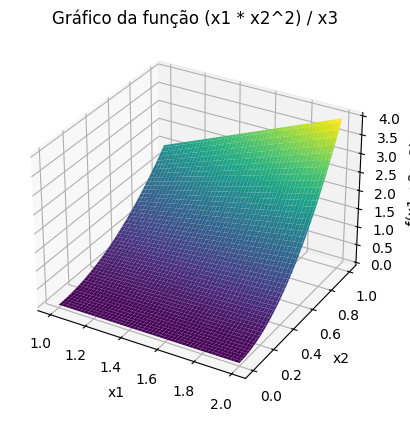

In [36]:
# Função a ser integrada
def fun_Q3(x1, x2, x3):
    return (x1 * (x2**2)) / x3

x1_values = np.linspace(1, 2, 100)
x2_values = np.linspace(0, 1, 100)
x3_values = np.linspace(-1, 1, 100)

# Criação de malha tridimensional
X1, X2 = np.meshgrid(x1_values, x2_values)
Z = fun_Q3(X1, X2, 0.5)  # Fixamos x3 = 0.5 para plotagem bidimensional

# Plotagem da superfície
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X1, X2, Z, cmap='viridis')
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('f(x1, x2, x3)')
ax.set_title('Gráfico da função (x1 * x2^2) / x3')
plt.show()


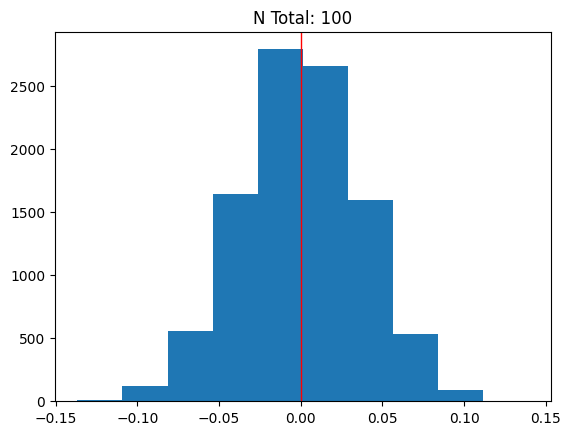

Valor da integral = 0.0003713277927409475
Erro padrão = 0.0003648356139384496


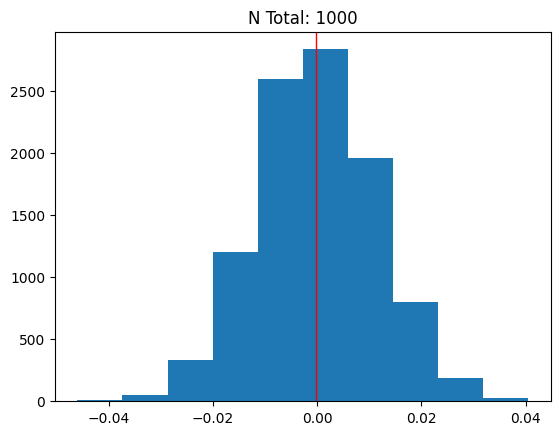

Valor da integral = -0.00017985390803968704
Erro padrão = 0.00011441825639140426


In [42]:
a_x3, b_x3 = 1, 2  # Limites de integração para x3
a_x2, b_x2 = 0, 1  # Limites de integração para x2
a_x1, b_x1 = -1, 1  # Limites de integração para x1

MonteCarlo_3D(a_x1, b_x1, a_x2, b_x2, a_x3, b_x3, 100, 10000, fun_Q3)
MonteCarlo_3D(a_x1, b_x1, a_x2, b_x2, a_x3, b_x3, 1000, 10000, fun_Q3)


## Discussão

O método Monte Carlo para integração se mostrou preciso no calculo das integrais mútiplas e mesmo com apenas 100 pontos o valor do erro ja foi bem baixo 

# Exercicio 4

In [45]:
def MonteCarlo_4(a, b, n, N, fun):
    lista = []
    
    for i in range(N):
        somatorio = 0
        for j in range(n):
            x_1 = np.random.rand()*b
            x_2 = np.random.rand()*b
            x_3 = np.random.rand()*b
            y_1 = np.random.rand()*b
            y_2 = np.random.rand()*b
            y_3 = np.random.rand()*b
            z_1 = np.random.rand()*b
            z_2 = np.random.rand()*b
            z_3 = np.random.rand()*b
            somatorio += fun(x_1,x_2,x_3,y_1,y_2,y_3,z_1,z_2,z_3)
        lista.append(((b-a)/n)*somatorio)
    
    err = np.std(lista)/N
    plt.hist(lista)
    resp = sum(lista)/N
    plt.axvline(resp, color='r', linewidth=1)
    plt.title("N Total: " + str(n))
    plt.show()
    print("Valor da integral = " + str(resp))
    print("Erro padrão = " + str(err))


In [46]:
def fun4(x_1,x_2,x_3,y_1,y_2,y_3,z_1,z_2,z_3):
    x = (x_1+x_2)*x_3
    y = (y_1+y_2)*y_3
    z = (z_1+z_2)*z_3
    return 1/(x+y+z)

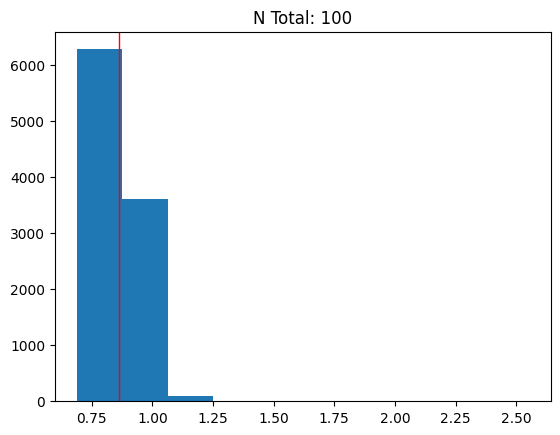

Valor da integral = 0.8632243291312028
Erro padrão = 7.148833213922067e-06


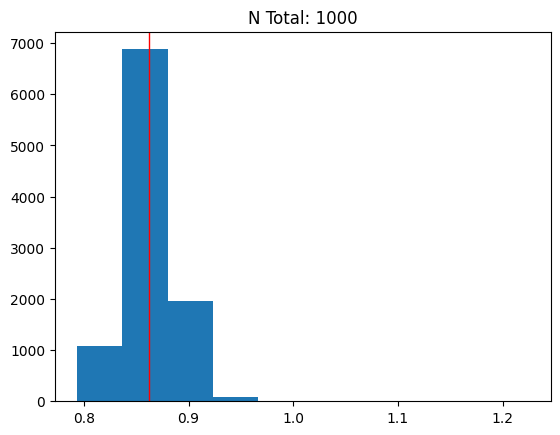

Valor da integral = 0.8627540162507362
Erro padrão = 2.2211301276986746e-06


In [48]:
MonteCarlo_4(0,1,100,10000,fun4)
MonteCarlo_4(0,1,1000,10000,fun4)


## Discussões

Assim como nas outras questões o método se mostrou bem eficiente mesmo em integrais mais complexas. Uma obsservação importante foi que nessa ultima questão o erro padrão foi tão pequeno que foi printado em notação científica
